# 12/05 - Working LSTM with R square and MAPE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import yfinance as yf

from tensorflow.keras import Sequential

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

import pandas_datareader as pdr

In [2]:
# Retrieve Data
df = pdr.get_data_yahoo("BTC-USD")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-15,1812.800049,1708.540039,1808.439941,1738.430054,731529024,1738.430054
2017-05-16,1785.939941,1686.540039,1741.699951,1734.449951,959044992,1734.449951
2017-05-17,1864.050049,1661.910034,1726.729980,1839.089966,1064729984,1839.089966
2017-05-18,1904.479980,1807.119995,1818.699951,1888.650024,894321024,1888.650024
2017-05-19,2004.520020,1890.250000,1897.369995,1987.709961,1157289984,1987.709961
...,...,...,...,...,...,...
2022-05-09,34222.074219,30296.953125,34060.015625,30296.953125,63355494961,30296.953125
2022-05-10,32596.308594,29944.802734,30273.654297,31022.906250,59811038817,31022.906250
2022-05-11,32013.402344,28170.414062,31016.183594,28936.355469,70388855818,28936.355469


In [3]:
df = df.drop(['Open','High','Low','Adj Close', 'Volume'], axis=1)

In [4]:
#pip install tensorflow

## Splitting train and test datasets 

* According to the number of days for prediction
* 30 days in our case

In [5]:
prediction_days = 30

df_train= df[:len(df)-prediction_days]
df_test= df[len(df)-prediction_days:]

## Scaling training set to fit the model

In [6]:
training_set = df_train.values
training_set = min_max_scaler.fit_transform(training_set)

x_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]

x_train = np.reshape(x_train, (len(x_train), 1, 1))

## Fit LSTM model / Training data

In [7]:
num_units = 4
activation_function = 'sigmoid'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 5
num_epochs = 10

# Initialize the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = num_units, activation = activation_function, input_shape=(None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = optimizer, loss = loss_function)

# Using the training set to train the model
regressor.fit(x_train, y_train, batch_size = batch_size, epochs = num_epochs)

Epoch 1/10
359/359 [==============================] - 4s 3ms/step - loss: 0.8901
Epoch 2/10
359/359 [==============================] - 1s 2ms/step - loss: 0.2003
Epoch 3/10
359/359 [==============================] - 1s 3ms/step - loss: 0.0776
Epoch 4/10
359/359 [==============================] - 1s 2ms/step - loss: 0.0607
Epoch 5/10
359/359 [==============================] - 1s 3ms/step - loss: 0.0571
Epoch 6/10
359/359 [==============================] - 1s 2ms/step - loss: 0.0541
Epoch 7/10
359/359 [==============================] - 1s 2ms/step - loss: 0.0505
Epoch 8/10
359/359 [==============================] - 1s 2ms/step - loss: 0.0462
Epoch 9/10
359/359 [==============================] - 1s 2ms/step - loss: 0.0412
Epoch 10/10
359/359 [==============================] - 1s 2ms/step - loss: 0.0354


## Predict values

In [8]:
test_set = df_test.values

inputs = test_set
inputs = min_max_scaler.transform(inputs)
#inputs = np.reshape(inputs)

predicted_price = regressor.predict(inputs)
predicted_price = min_max_scaler.inverse_transform(predicted_price)

## Visualising Actual x Predicted

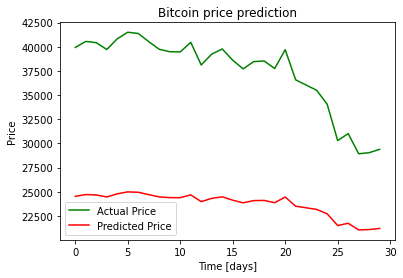

In [9]:
plt.plot(test_set, label="Actual Price", color='green')
plt.plot(predicted_price, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

## Calculating accuracy using r2_Score and MAPE

In [10]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

In [11]:
# Create a dataframe to store r2 score
evaluation_results = pd.DataFrame({'r2_score': r2_score(test_set, predicted_price)}, index = [0])
evaluation_results['MAPE'] = np.mean(np.abs(predicted_price - test_set)
                                                               /np.abs(test_set))*100 
# Display the results
evaluation_results

,r2_score,MAPE
0,-12.18348,36.145061
